<a href="https://colab.research.google.com/github/v4vishalchauhan/Machine_learning/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%config IPCompleter.greedy=True
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import missingno as msno   #for missing values plotting
from sklearn.preprocessing import Imputer

In [4]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle

!kaggle datasets list


!kaggle datasets download -d hesh97/titanicdataset-traincsv

Saving kaggle.json to kaggle.json
ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          36088  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          24601  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           5273  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          25243  
lava18/google-play-store

In [0]:
from zipfile import ZipFile
zip=ZipFile('titanicdataset-traincsv.zip','r')
zip.extractall()


In [0]:
data=pd.read_csv('train.csv')
print(data.shape)
print(data.head())
print(data.describe())
print(data.describe(include=['object','bool']))
print(data.columns)



38.38383838383838% People survived


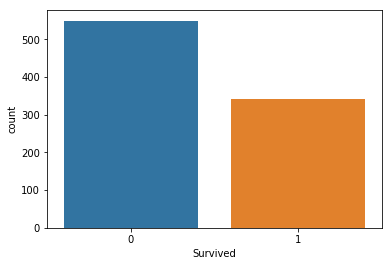

In [103]:
sns.countplot(x='Survived',data=data)
print("{}% People survived".format(((data.Survived==1).sum()/len(data.Survived))*100))


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Sex       female  male  All
Survived                   
0             81   468  549
1            233   109  342
All          314   577  891


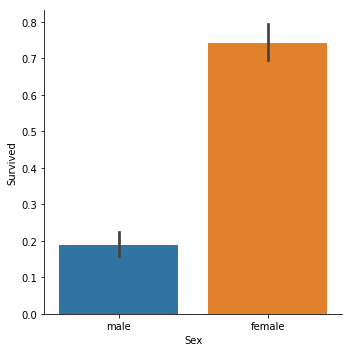

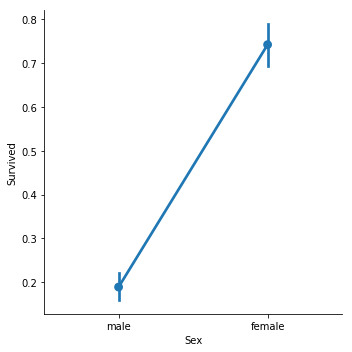

In [105]:

sns.factorplot(x='Sex',y='Survived',data=data,kind='bar')

sns.factorplot(x='Sex',y='Survived',data=data,kind='point')
print(pd.crosstab(data.Survived,data.Sex,margins=True))

Survived    0    1  All
Embarked               
C          75   93  168
Q          47   30   77
S         427  217  644
All       549  340  889


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


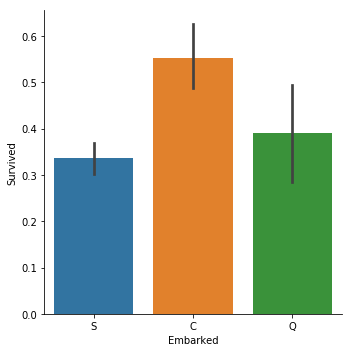

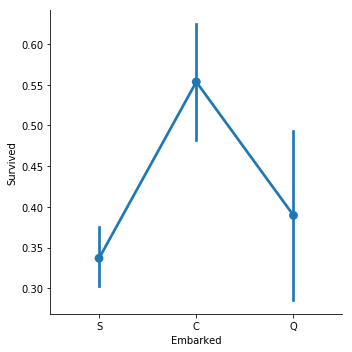

In [111]:
print(pd.crosstab(data.Embarked,data.Survived,margins=True))
sns.factorplot(x='Embarked',y='Survived',data=data,kind='bar')
sns.factorplot(x='Embarked',y='Survived',data=data,kind='point')


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


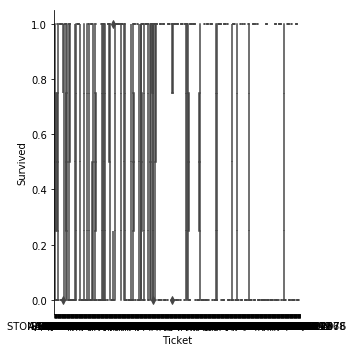

In [112]:

sns.factorplot(x='Ticket',y='Survived',data=data,kind='box')

Pclass      1    2    3  All
Survived                    
0          80   97  372  549
1         136   87  119  342
All       216  184  491  891


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


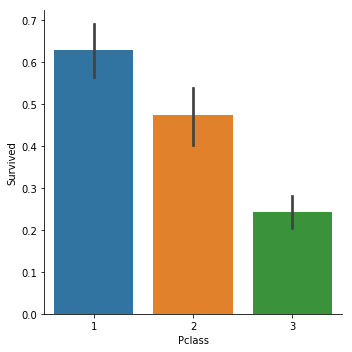

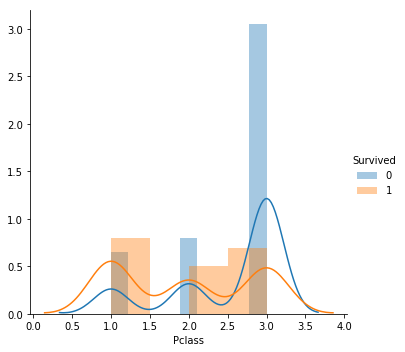

In [109]:
print(pd.crosstab(data.Survived,data.Pclass,margins=True))
sns.factorplot(x='Pclass',y='Survived',data=data,kind='bar')
sns.FacetGrid(data2,hue='Survived',size=5)\
   .map(sns.distplot,'Pclass')\
   .add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


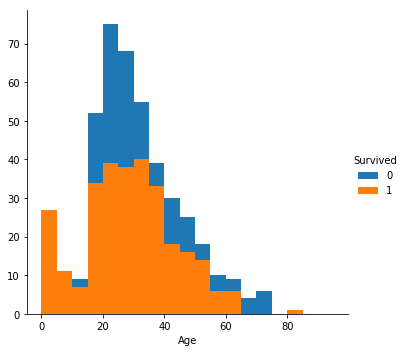

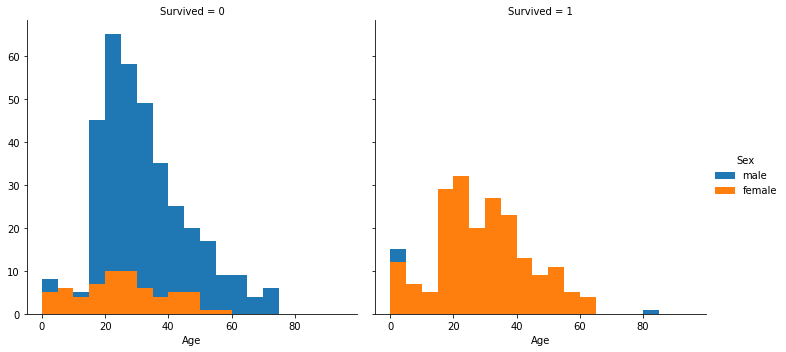

In [72]:
bins=np.arange(0,100,5)
sns.FacetGrid(data,hue='Survived',size=5)\
   .map(plt.hist,'Age',bins=bins)\
   .add_legend()
bins2=[0,1]
sns.FacetGrid(data,col='Survived',hue='Sex',size=5)\
   .map(plt.hist,'Age',bins=bins)\
   .add_legend()

Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


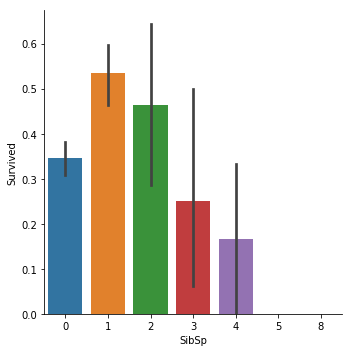

In [110]:
print(pd.crosstab(data.SibSp,data.Survived))
sns.factorplot(x='SibSp',y='Survived',data=data,kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Parch       0   1   2  3  4  5  6
Survived                         
0         445  53  40  2  4  4  1
1         233  65  40  3  0  1  0


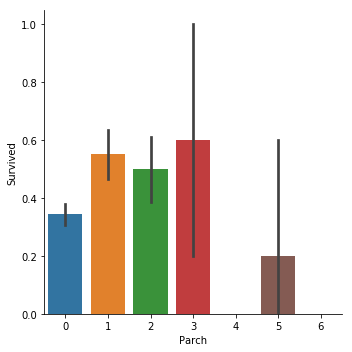

In [84]:
sns.factorplot(x='Parch',y='Survived',data=data,kind='bar')
print(pd.crosstab(data.Survived,data.Parch))

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


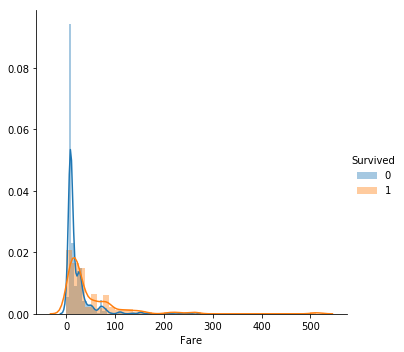

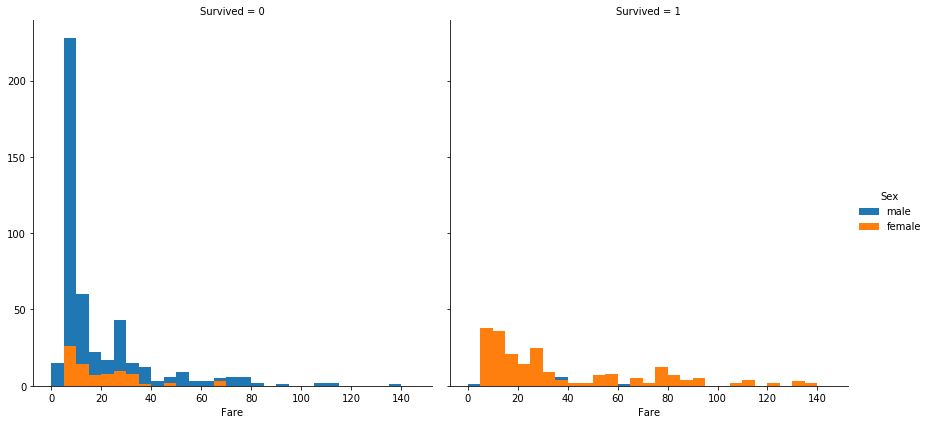

In [94]:
# sns.factorplot(x='Fare',y='Survived',data=data,kind='point')
# print(pd.crosstab(data.Fare,data.Survived))
sns.FacetGrid(data,hue='Survived',size=5)\
   .map(sns.distplot,'Fare')\
   .add_legend()
bins3=np.arange(0,150,5)
sns.FacetGrid(data,col='Survived',hue='Sex',size=6)\
   .map(plt.hist,'Fare',bins=bins3)\
   .add_legend()

Pclass             1    2    3  All
Survived Sex                       
0        female    3    6   72   81
         male     77   91  300  468
1        female   91   70   72  233
         male     45   17   47  109
All              216  184  491  891


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


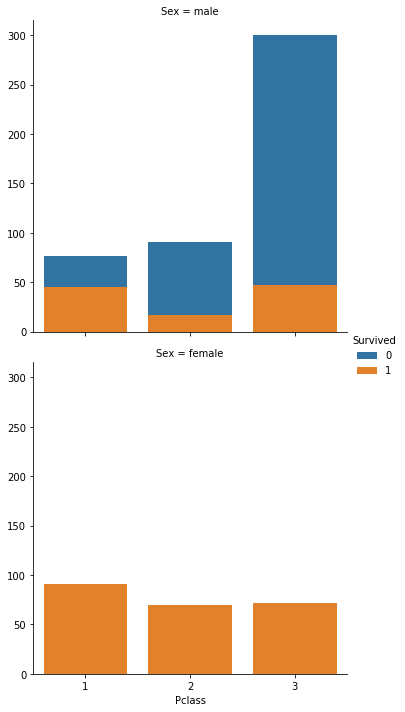

In [7]:
# print(data.Fare.describe())
print(pd.crosstab([data.Survived,data.Sex],data.Pclass,margins=True))

# plt.scatter(data=data,x='Age',y='Survived')
# sns.boxplot(data=data)
# sns.distplot(data.Age)
# plt.figure(1,figsize=(20,8))
# plt.xlim=(0,0)
# sns.factorplot(x='Fare',y='Survived',data=data,kind='point')
# bins=np.arange(0,50,2)
sns.FacetGrid(data,hue='Survived',row='Sex',size=5)\
   .map(sns.countplot,'Pclass')\
   .add_legend()

In [8]:
print(pd.crosstab([data.Survived,data.Sex],data.Age,margins=True))

Age              0.42  0.67  0.75  0.83  0.92  1.0  2.0  3.0  4.0  5.0  ...  \
Survived Sex                                                            ...   
0        female     0     0     0     0     0    0    4    1    0    0  ...   
         male       0     0     0     0     0    2    3    0    3    0  ...   
1        female     0     0     2     0     0    2    2    1    5    4  ...   
         male       1     1     0     2     1    3    1    4    2    0  ...   
All                 1     1     2     2     1    7   10    6   10    4  ...   

Age              63.0  64.0  65.0  66.0  70.0  70.5  71.0  74.0  80.0  All  
Survived Sex                                                                
0        female     0     0     0     0     0     0     0     0     0   64  
         male       0     2     3     1     2     1     2     1     0  360  
1        female     2     0     0     0     0     0     0     0     0  197  
         male       0     0     0     0     0     0     0    

In [9]:
kids=[data[data['Age']<=20]['Age']]    #0 -20
youth=[i for i in data.Age if i<60 and i>20]   # 20-60
elder=[data[data['Age']>=60]['Age']]   #60+
data2=data.copy()
# data2['kids']=kids
data2.Age=data2.Age.replace(kids,'kids')
data2.Age=data2.Age.replace(youth,'youth')
data2.Age=data2.Age.replace(elder,'elder')
# data2=data2.assign(kids)

print(pd.crosstab([data2.Survived,data2.Sex],data2.Age,margins=True))
print("#"*150)
print(pd.crosstab([data2.Survived,data2.Sex],[data2.Pclass,data2.Age],margins=True))

Age              elder  kids  youth  All
Survived Sex                            
0        female      0    24     40   64
         male       19    73    268  360
1        female      4    53    140  197
         male        3    29     61   93
All                 26   179    509  714
######################################################################################################################################################
Pclass              1                2                3             All
Age             elder kids youth elder kids youth elder kids youth     
Survived Sex                                                           
0        female     0    1     2     0    0     6     0   23    32   64
         male      12    3    46     3    9    72     4   61   150  360
1        female     3   13    66     0   16    52     1   24    22  197
         male       2    4    34     1   10     4     0   15    23   93
All                17   21   148     4   35   134     5  1

In [21]:
data2['family']=data2.Parch+data2.SibSp
print(pd.crosstab([data2.Survived,data2.Sex],data2.family,margins=True))
print(pd.crosstab([data2.Survived,data2.family],data2.Pclass,margins=True))

family             0    1    2   3   4   5   6  7  10  All
Survived Sex                                              
0        female   27   16   11   3   9   5   5  2   3   81
         male    347   56   32   5   3  14   3  4   4  468
1        female   99   71   38  16   3   3   3  0   0  233
         male     64   18   21   5   0   0   1  0   0  109
All              537  161  102  29  15  22  12  6   7  891
Pclass             1    2    3  All
Survived family                    
0        0        51   68  255  374
         1        19   16   37   72
         2         6   10   27   43
         3         2    3    3    8
         4         0    0   12   12
         5         2    0   17   19
         6         0    0    8    8
         7         0    0    6    6
         10        0    0    7    7
1        0        58   36   69  163
         1        51   18   20   89
         2        18   21   20   59
         3         5   10    6   21
         4         2    1    0    3
         5 

In [20]:
print(pd.crosstab([data2.Survived,data2.Sex],data2.Embarked,margins=True))

Embarked           C   Q    S  All
Survived Sex                      
0        female    9   9   63   81
         male     66  38  364  468
1        female   64  27  140  231
         male     29   3   77  109
All              168  77  644  889


# **EDA Conclusion** 

**` Single Variable vs Survival `**
*   Females survived more than male
*   Embarked from C has max. survival rate C>Q>S
*   We will not consider Cabin as lots of values are missing
*   Ticket is not related to survival
*   People from class 1 survived max 1>2>3
*   Most people's age is b/w 20-40,survived peiople's age is between 20-55 appox
*   People who had 1 sibling survived most 1>2>0>3>4
*   Parch 3 has max survival rate 3>1>2>0>5
*   People survived paid fare between 10 -80 approx,people not survived paid mostly 8-15 fare price 


---

**`Multiple variable vs Survival `**
*   In class 1 almost every female survived,mostly males died in class 3
*   Youth females survived most,no elder female died
*   Mostly male elder,kids died in class 1
*   Females which have 0 family member survived mostly,male which have 0 family member died most.
*  Families in class 1 survived mostly
*  People Embarked from S survived mostly










